In [ ]:
# https://github.com/networkx/networkx/issues/7101
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="networkx backend defined more than once: nx-loopback")
    import networkx as nx

In [1]:
#!pip install install dowhy

In [2]:
# https://github.com/networkx/networkx/issues/7101
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="networkx backend defined more than once: nx-loopback")
    import networkx as nx

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from dowhy import CausalModel
import dowhy.datasets
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [5]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])


In [6]:
model.summary()

"Model to find the causal effect of treatment ['v0'] on outcome ['y']"

In [7]:
#model.get_common_causes()
#model.get_effect_modifiers()
model.get_instruments()


In [8]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-0.163649,0.0,0.975227,1.660021,-0.842433,-0.280180,-1.464892,0,False,4.635415
1,-0.504401,0.0,0.893196,2.742412,0.961078,0.317135,0.766939,1,True,25.329099
2,1.664017,0.0,0.464240,0.312652,1.649981,-0.491467,-1.271055,0,True,20.342272
3,0.006554,0.0,0.743171,0.875394,0.259532,-0.967071,-0.703679,3,True,25.563680
4,1.908443,1.0,0.333391,-0.382802,0.512682,-0.611319,0.080225,3,True,32.197057
...,...,...,...,...,...,...,...,...,...,...
4995,2.286498,0.0,0.027170,1.814038,1.707134,0.338054,-0.618079,3,True,46.680916
4996,0.940758,1.0,0.036405,-1.030645,1.191022,0.729010,-0.003384,2,True,23.646768
4997,0.616309,0.0,0.315836,0.229301,1.301264,-1.314298,0.322508,2,True,21.980182
4998,0.892758,1.0,0.030111,-0.667486,0.364680,0.175239,-0.241924,3,True,27.285957


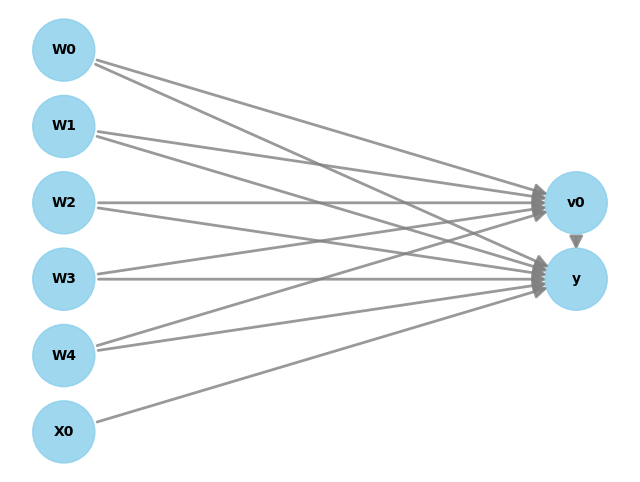

In [9]:
model.view_model()

In [10]:
#display(Image(filename="causal_model.png"))